In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [146]:
headers = ["num_thread", "image_size", "time_consuming"]
data = pd.read_csv("~/Downloads/courseMateria/EX/EX2/dataForDraw.csv", names=headers)
data.head()

,,,,,,num_thread,image_size,time_consuming
58752.000000,176832.000000,294912.000000,530496.000000,589824.000000,1.364820e+06,2.729640e+06,1.092746e+07,1.366007e+07
1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1.380886,1.712050,1.825591,1.854483,1.888534,1.918354e+00,1.955042e+00,1.982004e+00,1.999509e+00
1.165525,1.402417,1.450471,1.490111,1.519742,1.559463e+00,1.551667e+00,1.583362e+00,1.696906e+00
1.416612,1.785969,1.860923,1.882363,1.972223,2.068698e+00,2.044831e+00,2.095735e+00,2.096370e+00


In [147]:
image_sz = data["image_size"].drop_duplicates().tolist()
num_thread = data["num_thread"].drop_duplicates().tolist()

In [148]:
new_data = []
for img_sz in image_sz:
    for num in num_thread:
        ti = np.min(data.loc[np.logical_and(data["num_thread"] == num,
                                            data["image_size"] == img_sz),
                    "time_consuming"])
        data_i = [num, img_sz, ti]
        new_data.append(data_i)

In [149]:
new_array = np.array(new_data)[:,2].reshape(len(image_sz), len(num_thread)).T
speed_up = np.tile(new_array[0,:], (len(num_thread),1)) / new_array
new_frame = pd.DataFrame(new_array, columns=image_sz, index=num_thread)
speed_up_frame = pd.DataFrame(speed_up, columns=image_sz, index=num_thread)

In [150]:
np.tile(new_array[1,:], (4,1))

array([[nan,  1., nan, nan, nan],
       [nan,  1., nan, nan, nan],
       [nan,  1., nan, nan, nan],
       [nan,  1., nan, nan, nan]])

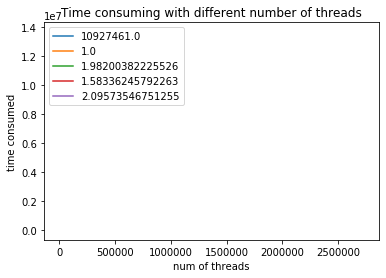

In [151]:
new_frame.plot()
plt.xlabel("num of threads")
plt.ylabel("time consumed")
plt.title("Time consuming with different number of threads")
plt.show()

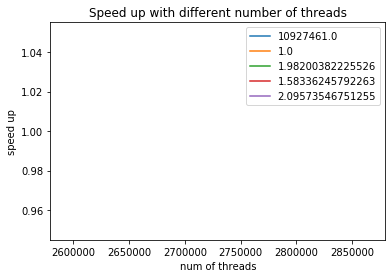

In [152]:
speed_up_frame.plot()
plt.xlabel("num of threads")
plt.ylabel("speed up")
plt.title("Speed up with different number of threads")
plt.show()



In [153]:
speed_up_frame

,1.092746e+07,1.000000e+00,1.982004e+00,1.583362e+00,2.095735e+00
2.729640e+06,1.0,NaN,NaN,NaN,NaN
1.000000e+00,NaN,NaN,NaN,NaN,NaN
1.955042e+00,NaN,NaN,NaN,NaN,NaN
1.551667e+00,NaN,NaN,NaN,NaN,NaN
2.044831e+00,NaN,NaN,NaN,NaN,NaN


In [154]:
speed_up_frame.to_csv("~/Downloads/courseMateria/EX/EX2/processedData.csv")

